In [1]:
import numpy as np
import matplotlib.pyplot as plt

# python3 이상에서는 xrange 대신 range 사용해야 합니다.

num_points = 1000
vectors_set = []

for i in range(num_points):
    x1 = np.random.normal(0.0, 0.55)
    y1 = x1 * 0.1 + 0.3 + np.random.normal(0.0, 0.03)
    vectors_set.append([x1, y1])
    
x_data = [v[0] for v in vectors_set]
y_data = [v[1] for v in vectors_set]

plt.plot(x_data, y_data, 'bo', label='data')
plt.legend()
plt.show()

<Figure size 640x480 with 1 Axes>

In [2]:
import tensorflow as tf

w = tf.Variable(tf.random_uniform([1], -1.0, 1.0))
b = tf.Variable(tf.zeros([1]))
y = w*x_data + b

Instructions for updating:
Colocations handled automatically by placer.


In [3]:
# cost function(label - estimate_value)
loss = tf.reduce_mean(tf.square(y - y_data))
optimizer = tf.train.GradientDescentOptimizer(0.5)
train = optimizer.minimize(loss)

In [4]:
# 변수 초기화
init = tf.global_variables_initializer()

sess = tf.Session()
sess.run(init)

In [5]:
# W와 b를 찾기 위해 반복적인 Train
for step in range(10):
    sess.run(train)
    print (step, sess.run(w), sess.run(b), sess.run(loss))

0 [0.64852786] [0.30044264] 0.0908861
1 [0.48443702] [0.30021524] 0.04508483
2 [0.36940697] [0.30005613] 0.022577118
3 [0.28876925] [0.29994458] 0.011516349
4 [0.23224103] [0.29986638] 0.0060808533
5 [0.19261394] [0.29981157] 0.0034097352
6 [0.16483478] [0.29977313] 0.0020970907
7 [0.14536119] [0.2997462] 0.001452029
8 [0.13170992] [0.29972732] 0.0011350323
9 [0.12214018] [0.29971406] 0.0009792532


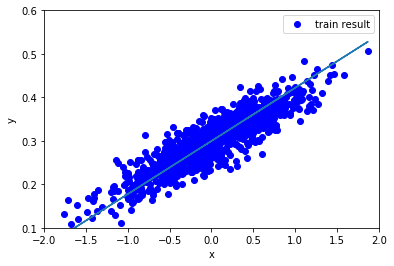

In [6]:
# 결과 그림으로 표현
plt.plot(x_data, y_data, 'bo', label='train result')
plt.plot(x_data, sess.run(w)*x_data + sess.run(b))
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.xlim(-2, 2)
plt.ylim(0.1, 0.6)
plt.show()